In [0]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np
import io

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

In [0]:
test = pd.read_csv('test.csv')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
df = pd.read_csv('train.csv')
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [0]:
data = df
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
X_2 = data.apply(le.fit_transform)

t2 = test.apply(le.fit_transform)

scaler = MinMaxScaler()
t2 = scaler.fit_transform(t2)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
X = X_2.drop(['readmitted_NO'],axis =1)
y = X_2['readmitted_NO'] 

X = scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


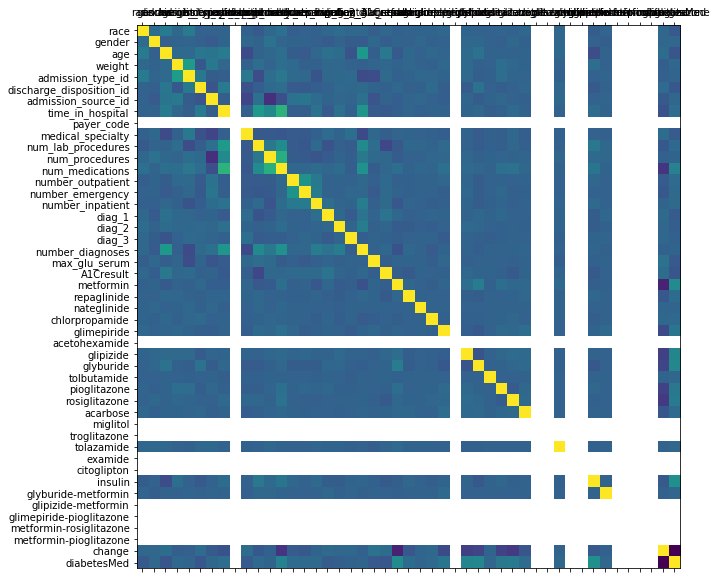

In [0]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(X)

In [0]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]
X.drop(X.columns[to_drop], axis=1)

AttributeError: ignored

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)

In [0]:
kmeans = KMeans(n_clusters=2, n_init = 200, random_state = 0, init ='k-means++'
               ,max_iter = 400, n_jobs = 24).fit(X)
y_pred3 = kmeans.fit_predict(t2)

In [0]:
from sklearn.metrics import accuracy_score

k = accuracy_score(y_test, y_pred3)
k

0.5272097702494034

In [0]:
sample = pd.read_csv('sample_sub.csv')
sample.dtypes

index     int64
target    int64
dtype: object

In [0]:
df_soln = pd.DataFrame(data = [test['index'], y_pred3], index = None)
df = df_soln.transpose()
df['index'] = df['index'].astype(int)
df.columns = ['index','target']
df['target'] = df['target'].astype(int)
df.to_csv('soln kmeans 3.csv',index = False)